Введение в Пандас. Анализ данных Нью-Йоркского байк-шеринга за январь 2018 год

* [all data](https://s3.amazonaws.com/tripdata/index.html)
* [info](https://www.citibikenyc.com/system-data)

In [1]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd

# Reading the dataset

In [2]:
!pwd

/Users/philippk/Dropbox/personal_projects/liceum/l5


In [3]:
path = '../data/l5/201801-citibike-tripdata.csv.zip'

In [4]:
df = pd.read_csv(path)

In [5]:
df.shape  # 15 колонок, ~719 тысяч поездок

(718994, 15)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head(3)
# or df.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1


In [8]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

# Feature Exploration

давайте посмотрим на сами данные

In [20]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,7.189940e+05,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000
mean,8.268107e+02,1469.519095,40.737894,-73.982934,1460.948474,40.737620,-73.983203,26078.046315,1977.765945,1.169969
std,3.279694e+04,1398.626487,0.044702,0.018219,1396.759046,0.044525,0.018273,6311.931441,12.016931,0.472668
min,6.100000e+01,72.000000,40.646538,-74.017134,72.000000,40.646538,-74.033552,14529.000000,1885.000000,0.000000
25%,3.190000e+02,377.000000,40.719079,-73.994685,376.000000,40.719105,-73.994758,19558.000000,1969.000000,1.000000
50%,5.100000e+02,497.000000,40.739355,-73.985649,497.000000,40.739323,-73.986580,28538.000000,1980.000000,1.000000
75%,8.420000e+02,3170.000000,40.756687,-73.974987,3169.000000,40.756405,-73.975232,31571.000000,1988.000000,1.000000
max,1.951005e+07,3664.000000,45.506364,-73.568906,3664.000000,45.506364,-73.568906,33522.000000,2002.000000,2.000000


## Stations

In [21]:
cols = ['start station id', 'end station id']

In [22]:
df[cols[0]].value_counts().head(10) # top start

519     8080
435     5093
3255    4852
402     4526
497     4503
490     4281
523     4278
477     4256
285     4223
459     4057
Name: start station id, dtype: int64

In [23]:
df[cols[1]].value_counts().head(10) # top end

519     8026
435     5132
3255    4956
497     4924
402     4784
459     4441
490     4368
523     4321
285     4296
477     4267
Name: end station id, dtype: int64

## Top destinations

In [24]:
df[cols].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [25]:
#   groupby колонки (любая колонка) (количество)    (топ 10 направлений)
df.groupby(cols)['start station id'].count().sort_values(ascending=False).head(10)

start station id  end station id
432               3263              533
519               498               326
435               509               305
3158              499               300
460               3093              280
519               492               278
258               324               270
481               3093              270
239               270               256
3263              317               253
Name: start station id, dtype: int64

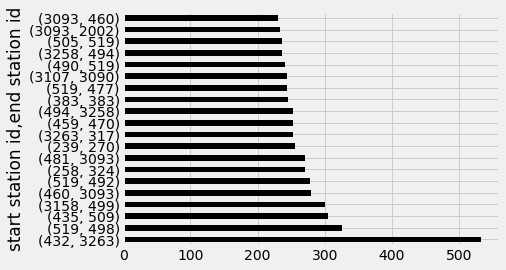

In [26]:
df.groupby(cols)['start station id'].count().sort_values(ascending=False).head(20).plot(kind='barh', color='k')

### Для самостоятельного изучения

Что это за станции? геокодинг
[Живой фид по станциям](https://feeds.citibikenyc.com/stations/stations.json)

[Визуализация в пандасе](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## Age

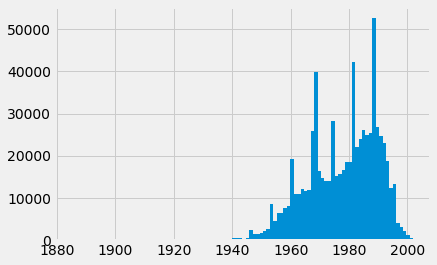

In [27]:
df['birth year'].hist(bins=100)

In [28]:
df['birth year'].max()

2002

In [29]:
df['birth year'].min()

1885

In [30]:
(2018 - df['birth year']).value_counts().head(5)

49    39851
29    26774
28    26741
33    26133
30    25817
Name: birth year, dtype: int64

## TripDuration

In [31]:
#  осторожно, bad practice!
df['tripduration'] = df['tripduration'] /  60  # в минутах. 

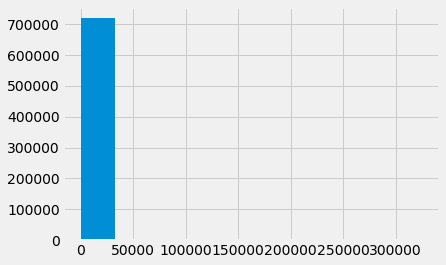

In [32]:
df['tripduration'].hist()

In [33]:
df['tripduration'].max() / (24*60)

225.81075231481481

In [35]:
hours = 1 
mask  = df['tripduration'] < hours * 60

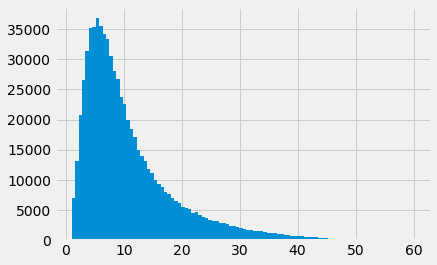

In [36]:
df[mask]['tripduration'].hist(bins=100)

# Минутка статистики

## Среднее и медиана

Среднее - сумма всех значений, деленное на количество значений. те "средний показатель"

$$ {\displaystyle A={\frac {1}{n}}\sum _{i=1}^{n}a_{i}={\frac {a_{1}+a_{2}+\cdots +a_{n}}{n}}} $$


In [37]:
def mean(list_of_numbers):
    return sum(list_of_numbers) / len(list_of_numbers) 

Медиана - среднее значение для двух средних (или одного, если нечетное количество) значений - другими словами, значение среднего

$${\displaystyle \mathrm {median} (a)={\frac {a_{\lceil \#x\div 2\rceil }+a_{\lceil \#x\div 2+1\rceil }}{2}}} $$

In [38]:
L = [1, 2]
len(L)/2

1.0

In [39]:
from math import floor

In [40]:
def median(list_of_numbers):
    L = len(list_of_numbers)
    sorted_l = sorted(list_of_numbers)  # *
    
    if L % 2 == 1:
        return sorted_l[floor(L/2)]
    
    else:
        second_el = int(L/2)
        return (sorted_l[second_el - 1] + sorted_l[second_el])/2

In [41]:
median([1,2,3])

2

In [42]:
median([1,4,3,2])

2.5

In [43]:
mean_td = df['tripduration'].mean()
f"Среднее время поездки - {mean_td:.2f} минуты"

'Среднее время поездки - 13.78 минуты'

In [44]:
median_td = df['tripduration'].median()
f"Медианное время поездки - {median_td:.2f} минуты"

'Медианное время поездки - 8.50 минуты'

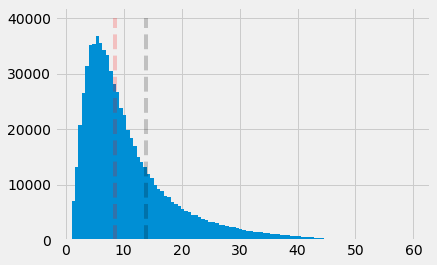

In [45]:
ax = df[mask]['tripduration'].hist(bins=100)
ax.vlines(mean_td, 0, 40000, linestyles='--', color='black', alpha=.2)
ax.vlines(median_td, 0, 40000, linestyles='--', color='red', alpha=.2)


In [46]:
ttdf = df.loc[mask]

In [47]:
mean_ctd = ttdf['tripduration'].mean()
median_ctd = ttdf['tripduration'].median()
print(f"после очистки среднее:{mean_ctd:.2f}, медиана:{median_ctd:.2f}")

после очистки среднее:10.97, медиана:8.47


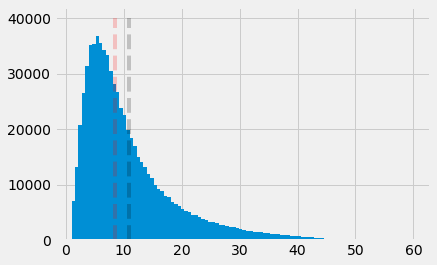

In [48]:
ax = df[mask]['tripduration'].hist(bins=100)
ax.vlines(mean_ctd, 0, 40000, linestyles='--', color='black', alpha=.2)
ax.vlines(median_ctd, 0, 40000, linestyles='--', color='red', alpha=.2)

## Среднее абсолютное отклонение (Mean Absolute Deviation)

In [49]:
def mad(list_of_numbers):
    M = mean(list_of_numbers)
    return sum([abs(el - M) for el in list_of_numbers]) / len(list_of_numbers)

In [50]:
mad([1,2,3,4,5])

1.2

In [51]:
6/5

1.2

## Как еще можно оценить это распределение? - Дисперсия

то же самое, но через квадраты

- уменьшает робастность (увеличивает влияние выхлопов)
- не те же единицы
- непрерывная функция, интегрируется

$${\displaystyle D[X]=\sum _{i=1}^{n}{p_{i}(x_{i}-M[X])^{2}}}$$

### Посчитать дисперсию самому в чистом питоне

In [52]:
def mean(list_of_numbers):
    return sum(list_of_numbers) / len(list_of_numbers) 

def variance(list_of_numbers, ddof=1):
    M = mean(list_of_numbers)
    return sum([(x-M)**2 for x in list_of_numbers]) / (len(list_of_numbers) - 1)

In [53]:
variance(ttdf['tripduration'])

68.18999555028573

In [54]:
%timeit variance(ttdf['tripduration'])

192 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### посчитать дисперсию самому в Пандас

In [55]:
def hb_var(series, ddof=1):
    return ((series - series.mean())**2).sum() / (len(series) - 1)

In [56]:
hb_var(ttdf['tripduration'])

68.189995550278198

In [57]:
%timeit hb_var(ttdf['tripduration'])

10.7 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Pandas variance

In [58]:
ttdf['tripduration'].var()

68.18999555028573

In [59]:
%timeit ttdf['tripduration'].var()

2.09 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Стандартная ошибка

Но дисперсия в квадратах величины (квадратные секунды). Что делать?

$${\displaystyle s={\sqrt {\frac {\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}{N-1}}}.}$$

In [60]:
STD = ttdf['tripduration'].std()
STD

8.257723387852474

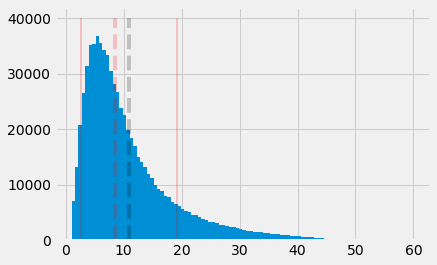

In [61]:
ax = df[mask]['tripduration'].hist(bins=100)
ax.vlines(mean_ctd, 0, 40000, linestyles='--', color='black', alpha=.2)
ax.vlines(median_ctd, 0, 40000, linestyles='--', color='red', alpha=.2)
ax.vlines([mean_ctd + STD, mean_ctd - STD], 0, 40000,  color='red', alpha=.2, linewidth=2)

# Различие в поведении - пол, подписка

In [167]:
df['age'] = 2018 - df['birth year']

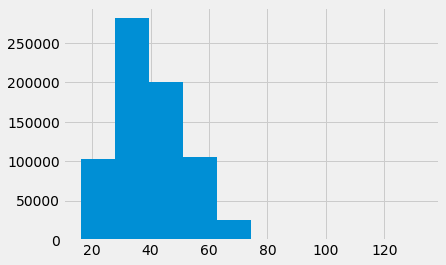

In [168]:
df['age'].hist()

In [157]:
df['birth year'].min()

1885

In [169]:
age_mask = df['age'] < 80

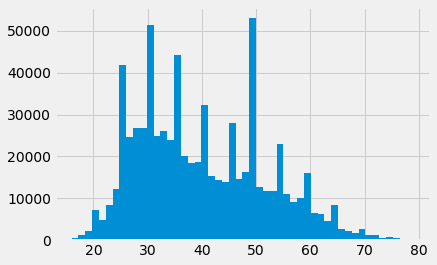

In [174]:
df.loc[age_mask, 'age'].hist(bins=50)

In [ ]:
mask = 
df.loc[mask, 'year'] = df.loc[mask, 'year'] + 100

In [ ]:
df['age'] = 2018 - df['year']

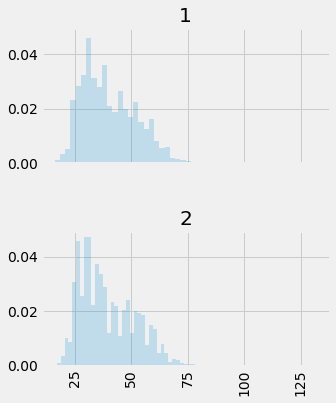

In [188]:
df[df.gender > 0 ].hist(column='age', by='gender', bins=50, alpha=.2, sharex=True, sharey=True, layout=(3,1), figsize=(5,10), density=1);

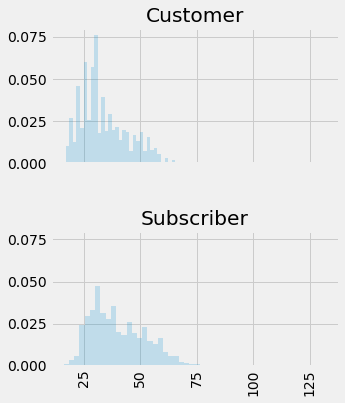

In [193]:
df[df.gender > 0 ].hist(column='age', by='usertype', bins=50, alpha=.2, sharex=True, sharey=True, layout=(3,1), figsize=(5,10), density=1);

In [211]:
sdf = df[df.tripduration < 60]
sdf['gender'] = sdf['gender'].replace({0:'Unknown', 1:'Man', 2:"Woman"}).astype('category')
sdf['usertype'] = sdf['usertype'].astype('category')

/Users/philippk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/philippk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


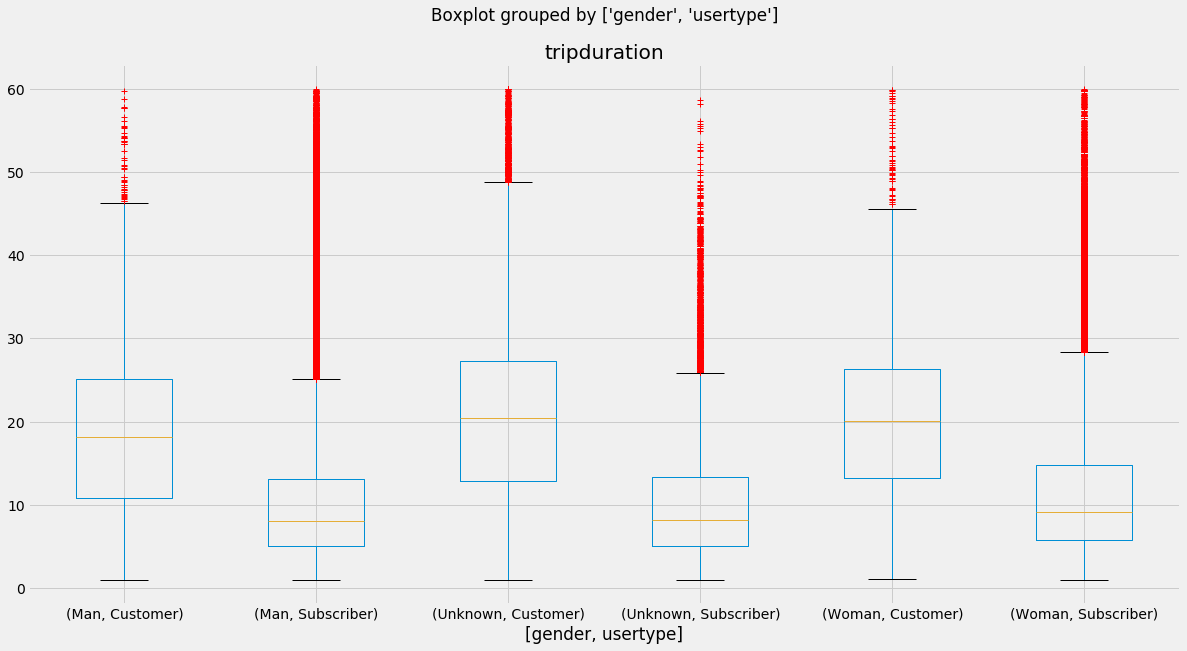

In [216]:
sdf[['tripduration', 'gender', 'usertype']].boxplot( by=['gender', 'usertype'], sym='r+', figsize=(20, 10))

# Распределение

In [69]:
import scipy
import numpy as np
from scipy import stats

In [140]:
size=35

In [141]:
Y = df.loc[df.tripduration < size, 'tripduration']

In [142]:
def plot_pdf(dist, y, size, name, ax=None):
    x = scipy.arange(size)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.plot(pdf_fitted, label=name, alpha=.3)


In [145]:
distributions = {
    'beta': stats.beta,
    'gamma': stats.gamma,
    'weibull_min': stats.weibull_min
}

/Users/philippk/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


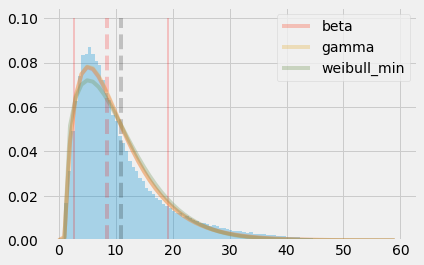

In [146]:
ax = df[mask]['tripduration'].hist(bins=100, density=1, alpha=.3)
ax.vlines(mean_ctd, 0, .1, linestyles='--', color='black', alpha=.2)
ax.vlines(median_ctd, 0,.1, linestyles='--', color='red', alpha=.2)
ax.vlines([mean_ctd + STD, mean_ctd - STD], 0, .1,  color='red', alpha=.2, linewidth=2)

for name, distr in distributions.items():
    plot_pdf(distr, Y, 60, name, ax)
    
plt.legend()

In [148]:
param = stats.beta.fit(y)
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])

/Users/philippk/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/philippk/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [152]:
pdf_fitted[9:].sum()  # примерный шанс что путеществие будет больше чем 9 минут -- почти 50%, что (почти) бьется с медианой.

0.53314147679346757

In [155]:
pdf_fitted[20:].sum() # примерный шанс что путеществие будет больше чем 20 минут ~ 13%

0.1270940150203477